In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import chain
import pickle
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# # Read in average monthly consumption dataframe
X = pd.read_csv('AMC_dataframe.csv', index_col=['ProfileID'])
AMC_df = X.copy()
X.reset_index(inplace = True)

# # Extract household IDs
sorted_households_ids = pd.read_pickle('sorted_households_winter_weekdays.pkl') # Read pickle file with household ids that pass Error Threshold
household_ids = list(sorted_households_ids.values())
householdIDs =  [l.tolist() for l in household_ids]
householdIDs = list(map(int, chain.from_iterable(householdIDs)))

# # Filter the sorted households ids in AMC dataframe
AMC_df = X[X['ProfileID'].isin(householdIDs)] 
AMC_df.set_index(['ProfileID'], inplace=True)


# # Load Gauss Fit features
# df_50_150 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_50_150.csv',  header=[0, 1], index_col = 0)
# df_150_400 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_150_400.csv',  header=[0, 1], index_col = 0)
# df_400_600 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_400_600.csv',  header=[0, 1], index_col = 0)
# df_600_1200 = pd.read_csv('data/features/FitFeatures/FitFeatures_600_1200.csv',  header=[0, 1], index_col = 0)
# df_1200_2500 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_1200_2500.csv',  header=[0, 1], index_col = 0)
# df_2500_4000 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_2500_4000.csv',  header=[0, 1], index_col = 0)

# Load Gauss Fit Features for the winter and weekday features
df_50_150 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_50_150.csv',  header=[0, 1], index_col = 0)
df_150_400 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_150_400.csv',  header=[0, 1], index_col = 0)
df_400_600 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_400_600.csv',  header=[0, 1], index_col = 0)
df_600_1200 = pd.read_csv('data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_600_1200.csv',  header=[0, 1], index_col = 0)
df_1200_2500 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_1200_2500.csv',  header=[0, 1], index_col = 0)
# sorted_households_ids = pd.read_pickle('sorted_households.pkl') # Read pickle file with household ids that pass Error Threshold
# household_ids = list(sorted_households_ids.values())
# householdIDs =  [l.tolist() for l in household_ids]
# householdIDs = list(map(int, chain.from_iterable(householdIDs)))

# # Filter the sorted households ids in AMC dataframe
# AMC_df = X[X['ProfileID'].isin(householdIDs)] 
# AMC_df.set_index(['ProfileID'], inplace=True)


# Load Gauss Fit features
df_50_150 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_50_150.csv',  header=[0, 1], index_col = 0)
df_150_400 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_150_400.csv',  header=[0, 1], index_col = 0)
df_400_600 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_400_600.csv',  header=[0, 1], index_col = 0)
df_600_1200 = pd.read_csv('data/features/FitFeatures/FitFeatures_600_1200.csv',  header=[0, 1], index_col = 0)
df_1200_2500 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_1200_2500.csv',  header=[0, 1], index_col = 0)
df_2500_4000 = pd.read_csv(r'data/features/FitFeatures/FitFeatures_2500_4000.csv',  header=[0, 1], index_col = 0)

# Load Gauss Fit Features for the winter and weekday features
# df_50_150 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_50_150.csv',  header=[0, 1], index_col = 0)
 # df_150_400 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_150_400.csv',  header=[0, 1], index_col = 0)
# df_400_600 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_400_600.csv',  header=[0, 1], index_col = 0)
# df_600_1200 = pd.read_csv('data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_600_1200.csv',  header=[0, 1], index_col = 0)
# df_1200_2500 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_1200_2500.csv',  header=[0, 1], index_col = 0)
# df_2500_4000 = pd.read_csv(r'data/features/FitFeatures/Winter_Weekdays/Winter_weekdays_FitFeatures_2500_4000.csv',  header=[0, 1], index_col = 0)

# Select all filtered households 
# df_50_150.loc[sorted_households_ids['50_150']] 
# df_150_400.loc[sorted_households_ids['150_400']]
# df_400_600.loc[sorted_households_ids['400_600']] 
# df_600_1200.loc[sorted_households_ids['600_1200']] 
# df_1200_2500.loc[sorted_households_ids['1200_2500']] 

# Create the Gauss Fit Features Dataframe
frame = [df_150_400,df_400_600,df_600_1200,df_1200_2500]#df_150_400,df_2500_4000
frame = [df_150_400,df_400_600,df_600_1200,df_1200_2500,df_2500_4000]#df_150_400,df_2500_4000
df = pd.DataFrame()
df = df_50_150.append(frame)

#Select rows based on condition 
df.reset_index(inplace=True)

# Filter out all household ids from Gauss Fit Features Dataframe that are not in AMC dataframe 
df = df[df['ProfileID'].isin(AMC_df.index.values)].copy()
df.set_index(['ProfileID'], inplace=True)
df = df.droplevel([0],axis = 1) # Drop level on multi column

# # Create dataframe with the winter weekday gauss fit features
# df_winter_weekdays = df[df['ProfileID'].isin(AMC_df.index.values)].copy()
# df_winter_weekdays.set_index(['ProfileID'], inplace=True)
# df_winter_weekdays = df_winter_weekdays.droplevel([0],axis = 1) # Drop level on multi column

# # Filter out all household ids from AMC dataframe that are not in Gauss Fit Features Dataframe 
AMC_df.reset_index(['ProfileID'], inplace=True)
AMC_df = X[X['ProfileID'].isin(df.index.values)] #df_winter_weekdays.index.values
AMC_df.set_index(['ProfileID'], inplace=True)

# Load Metadata
df1 = pd.read_csv(r"data/survey_data/delskv-1994-2014.csv",  header=[0], index_col = 0)
meta_df = df1[['floor_area', 'wall_material','total_adults', 'total_children','monthly_income','water_access','roof_material','years_electrified']] # Select relevant features
meta_df['total_residents'] = meta_df.loc[:,'total_adults'] + meta_df.loc[:,'total_children'] # Create total_residents feature

C:\Users\MEDIA_~1\AppData\Local\Temp/ipykernel_5516/3943566984.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meta_df['total_residents'] = meta_df.loc[:,'total_adults'] + meta_df.loc[:,'total_children'] # Create total_residents feature


### Filter the Meta dataframe and the AMC dataframe

In [3]:
# Drop all NaN values from dataframe
meta_df = meta_df.dropna()

# Filter out only households with Gauss Fit that completed a survey
households_ids1 = AMC_df.index.to_list()
meta_df_filtered = meta_df.loc[meta_df.index.isin(households_ids1),:]

# # Filter out only households that completed a survey from Gauss Fit
households_ids2 = meta_df_filtered.index.to_list()
AMC_df_filtered = AMC_df.loc[AMC_df.index.isin(households_ids2),:]

In [4]:
# Load the ids with complete winter months
# save list of houeholds with complete winter months
with open("winter_months_ids", "rb") as fp:   # Unpickling
   winter_months_ids = pickle.load(fp)

# Filter out profiles with incomplete winter months
# Filter out only households with Gauss Fit that completed a survey
# households_ids1 = AMC_df.index.to_list()
meta_df_winter = meta_df_filtered.loc[meta_df_filtered.index.isin(winter_months_ids),:]

# # Filter out only households that completed a survey from Gauss Fit
# households_ids2 = meta_df_filtered.index.to_list()
AMC_df_winter = AMC_df_filtered.loc[AMC_df_filtered.index.isin(winter_months_ids),:]

### Create Encoded dataframe

In [5]:
enc = LabelEncoder()

# Encode the non-numeric columns from the Meta Data
enc.fit(meta_df_filtered['roof_material'])
meta_df_filtered.loc[:,'roof_material_ENC'] = enc.transform(meta_df_filtered.loc[:,'roof_material'])

enc.fit(meta_df_filtered['water_access'])
meta_df_filtered.loc[:,'water_access_ENC'] = enc.transform(meta_df_filtered.loc[:,'water_access'])

enc.fit(meta_df_filtered['wall_material'])
meta_df_filtered.loc[:,'wall_material_ENC'] = enc.transform(meta_df_filtered.loc[:,'wall_material'])

meta__df_encoded = meta_df_filtered.loc[:,['floor_area', 'monthly_income','total_residents','roof_material_ENC','water_access_ENC','wall_material_ENC', 'years_electrified']].copy()
encoded_df = pd.merge(meta__df_encoded,AMC_df, left_index = True,right_index=True)

C:\Users\MEDIA_LAB\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


### Create encoded dataframe containing the meat data, gauss fit data and the AMC data

In [6]:
# ids_winters_months = pd.read_pickle(r'winter_months_ids') # Uncomment when using only winter weekdays data

encoded_df2 = pd.merge(encoded_df, df, left_index = True, right_index = True) # df_winter_weekdays

# encoded_df_filtered = encoded_df2.loc[encoded_df2.index.isin(ids_winters_months),:] # Uncomment when using winter weekdays dataframe

In [ ]:
# AMC_Fit_df = pd.read_csv('AMC_FIT_kmeans_dataframe.csv')
# AMC_Fit_df.set_index(['ProfileID'], inplace = True)

# # Dropping a level down
# # df.columns = df.columns.droplevel(0)
# encoded_df2 = pd.merge(meta__df_encoded,AMC_Fit_df, left_index = True,right_index=True)

### Filter the Meta dataframe and the AMC dataframe

In [7]:
# Drop all NaN values from dataframe
meta_df = meta_df.dropna()

# Filter out only households with Gauss Fit that completed a survey
households_ids1 = AMC_df.index.to_list()
meta_df_filtered = meta_df.loc[meta_df.index.isin(households_ids1),:]

# # Filter out only households that completed a survey from Gauss Fit
households_ids2 = meta_df_filtered.index.to_list()
AMC_df_filtered = AMC_df.loc[AMC_df.index.isin(households_ids2),:]

In [8]:
# Load the ids with complete winter months
# save list of houeholds with complete winter months
with open("winter_months_ids", "rb") as fp:   # Unpickling
   winter_months_ids = pickle.load(fp)

# Filter out profiles with incomplete winter months
# Filter out only households with Gauss Fit that completed a survey
# households_ids1 = AMC_df.index.to_list()
meta_df_winter = meta_df_filtered.loc[meta_df_filtered.index.isin(winter_months_ids),:]

# # Filter out only households that completed a survey from Gauss Fit
# households_ids2 = meta_df_filtered.index.to_list()
AMC_df_winter = AMC_df_filtered.loc[AMC_df_filtered.index.isin(winter_months_ids),:]

### Create Encoded dataframe

In [9]:
enc = LabelEncoder()

# Encode the non-numeric columns from the Meta Data
enc.fit(meta_df_filtered['roof_material'])
meta_df_filtered.loc[:,'roof_material_ENC'] = enc.transform(meta_df_filtered.loc[:,'roof_material'])

enc.fit(meta_df_filtered['water_access'])
meta_df_filtered.loc[:,'water_access_ENC'] = enc.transform(meta_df_filtered.loc[:,'water_access'])

enc.fit(meta_df_filtered['wall_material'])
meta_df_filtered.loc[:,'wall_material_ENC'] = enc.transform(meta_df_filtered.loc[:,'wall_material'])

meta__df_encoded = meta_df_filtered.loc[:,['floor_area', 'monthly_income','total_residents','roof_material_ENC','water_access_ENC','wall_material_ENC', 'years_electrified']].copy()
encoded_df = pd.merge(meta__df_encoded,AMC_df, left_index = True,right_index=True)

### Create encoded dataframe containing the meat data, gauss fit data and the AMC data

In [15]:
ids_winters_months = pd.read_pickle(r'winter_months_ids') # Uncomment when using only winter weekdays data

encoded_df2 = pd.merge(encoded_df, df, left_index = True, right_index = True) # df_winter_weekdays

encoded_df_filtered = encoded_df2.loc[encoded_df2.index.isin(ids_winters_months),:] # Uncomment when using winter weekdays dataframe

In [11]:
# AMC_Fit_df = pd.read_csv('AMC_FIT_kmeans_dataframe.csv')
# AMC_Fit_df.set_index(['ProfileID'], inplace = True)

# # Dropping a level down
# # df.columns = df.columns.droplevel(0)
# encoded_df2 = pd.merge(meta__df_encoded,AMC_Fit_df, left_index = True,right_index=True)

# Analyse the data

In [13]:
# Remove outliers

# Find absolute value of z-score for each observation
z = np.abs(stats.zscore(encoded_df))

# #only keep rows in dataframe with all z-scores less than absolute value of 3 
df2 = encoded_df[(z<3).all(axis=1)]

# Perform Linear Regression

### On all points

R2 = -0.2285590862578073
Adjusted r2 = -0.22896215682416488
AIC = 44471.61016572844


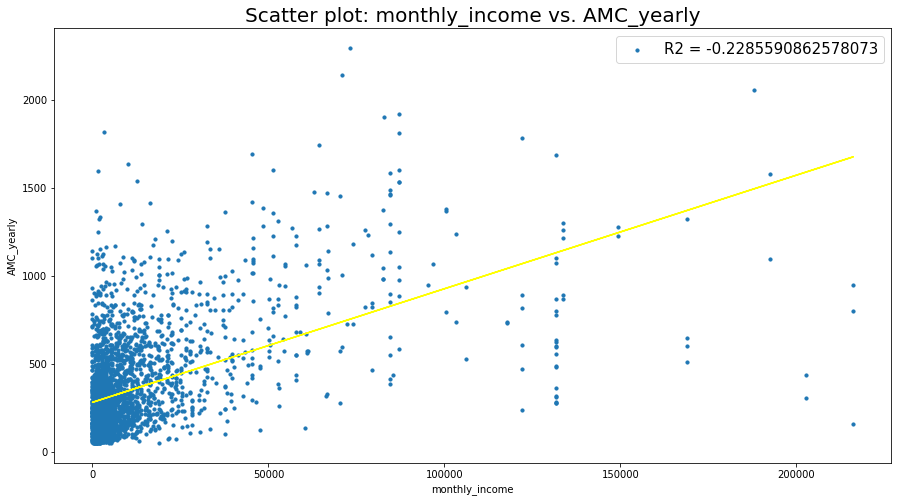

In [16]:
from sklearn.metrics import r2_score
import statsmodels.api as sm


feature1 = 'monthly_income'
feature2 = 'AMC_yearly'

x = encoded_df_filtered[feature1]
y = encoded_df_filtered[feature2]

n = len(x)
p = 1

r2 = r2_score(x, y)
Adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(f"R2 = {r2}")
print(f"Adjusted r2 = {Adj_r2}")

x_label = feature1
y_label = feature2

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

fig, ax = plt.subplots(figsize =(15, 8))

#fit regression model
model = sm.OLS(y, x).fit()
AIC = model.aic
print(f'AIC = {AIC}')

plt.scatter(x, y, s = 10,label = "R2 = " + str(r2))
plt.plot(x, mymodel, c = 'yellow')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=15)
plt.title("Scatter plot: " + x_label + " vs. " + y_label)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
# ax.set_ylim(0,20)
plt.legend(prop = {'size':15})
# ax.set_yscale(scale)
# ax.set_xscale(scale)
plt.show()

### On median points

In [17]:
# Create binned dataset
df = pd.DataFrame()
df = pd.merge(df2_filtered['Morning'], meta_df_filtered, left_index=True, right_index=True)


bins = np.arange(0,1000,100)

df['bins'] = pd.cut(df.floor_area, bins=bins,  right=False, include_lowest=True)

sigma1_median = df.groupby(['bins'])['sigma1'].median() # Calculate median sigma value for each bin
sigma_1_DF = sigma1_median.to_frame() 
sigma_1_DF['bins'] = np.arange(0,900,100)

NameError: name 'df2_filtered' is not defined

In [20]:
encoded_df2_0 = encoded_df2[encoded_df2['A1_labels'] == 1].copy()

x_feature = 'total_residents'
y_feature =  'monthly_income'
# import statsmodels.api as sm

# fit regression model
model = LinearRegression()
y, X = encoded_df2[y_feature], encoded_df2[x_feature]

X = np.array(X.values.tolist())
y = np.array(y.values.tolist())

# y = y.reshape(-1,1)
X = X.reshape(-1,1)

model.fit(X, y) # Linear Regression model

#display adjusted R-squared
r2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

# x = sigma_1_DF['bins']
# y = sigma_1_DF['sigma1']

x_label = x_feature
y_label = y_feature

fig, ax = plt.subplots(figsize =(15, 8))

plt.scatter(X,y, label = "Adjusted R-squared = " + str('{0:.3g}'.format(r2)))
plt.plot(X, model.predict(X), '--', c = 'yellow')
plt.rc('axes', titlesize=20) 
plt.rc('axes', labelsize=15)
plt.title("Scatter plot: " + x_label + " vs. " + y_label)
ax.set_xlabel(x_label)
ax.set_ylabel(y_label)
# ax.set_ylim(0,2)
plt.legend(prop = {'size':15})
# ax.set_yscale(scale)
# ax.set_xscale(scale)
plt.show()

fig.savefig("LR_" + x_label + "vs" + y_label + ".png", bbox_inches='tight')

KeyError: 'A1_labels'

In [ ]:
# temp = meta_df_filtered.loc[~(meta_df_filtered['monthly_income'] == 0.0)] # filter out all households with R0 monthly income, Treat as incorrectly filled in questionaire

# temp_df = pd.merge(meta_df_filtered['monthly_income'], df2['Morning']['sigma1'], left_index=True, right_index=True)

# Regression on AMC vs meatdata 10 bins

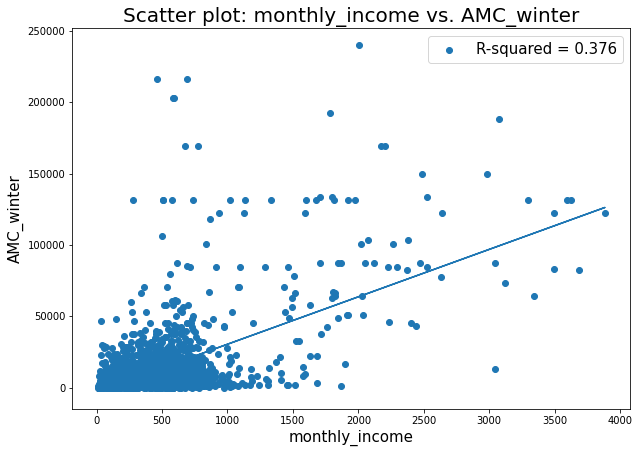

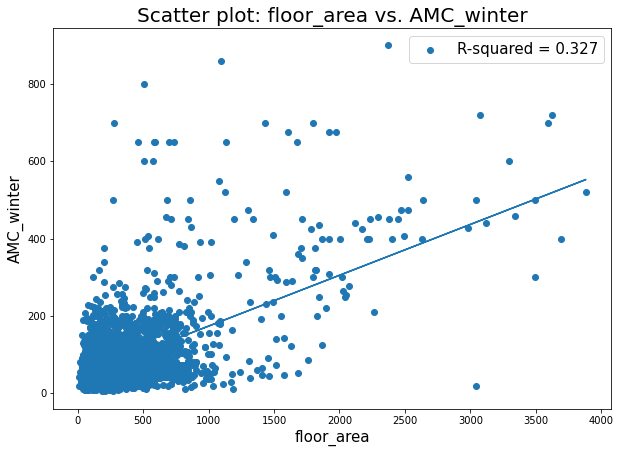

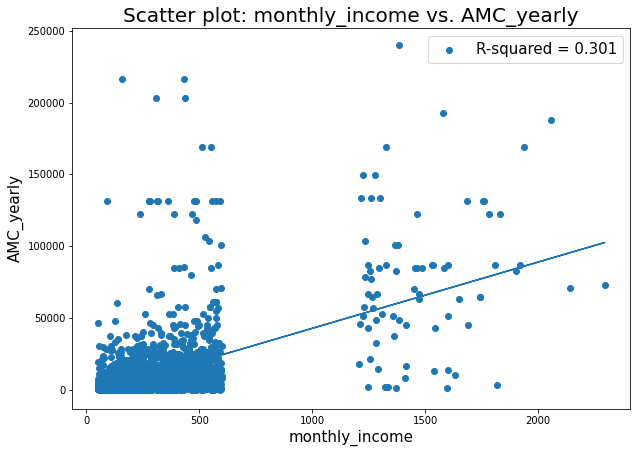

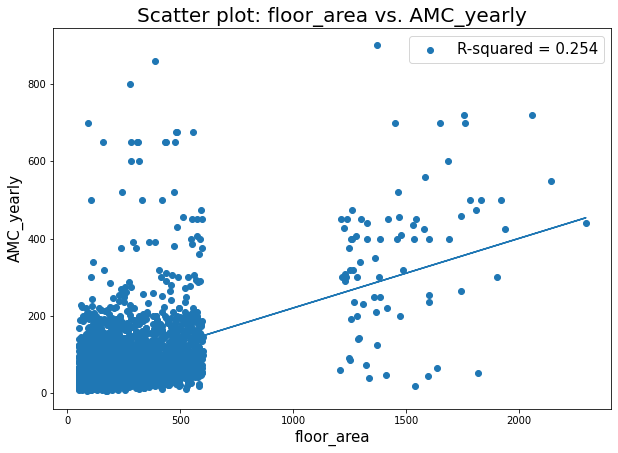

In [ ]:
column_string = ['monthly_income', 'floor_area']

for j in AMC_df_filtered:

    for column in column_string:
    
        temp_df = pd.merge(meta_df_winter[column], AMC_df_filtered[j], left_index=True, right_index=True)

        # temp_df = pd.merge(meta_df_filtered['monthly_income'], df2[day][j], left_index=True, right_index=True)

        # Bin the data frame by "a" with 10 bins...
        bins = np.linspace(temp_df[column].min(), temp_df[column].max(), 10)
        groups = temp_df.groupby(np.digitize(temp_df[column], bins))
        
        # fit regression model
        model = LinearRegression()
        y, X = temp_df[column], temp_df[j]

        X = np.array(X.values.tolist())
        y = np.array(y.values.tolist())
        # y = groups.median()[j]
        # X = bins

        X = X.reshape(-1,1)

        model.fit(X, y) # Linear Regression model

        #display adjusted R-squared
        r2 = 1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

        x_label = temp_df.columns[0]
        y_label = temp_df.columns[1]

        fig, ax = plt.subplots(figsize =(10, 7))

        plt.scatter(X, y, label = "R-squared = " + str('{0:.3g}'.format(r2)))
        plt.plot(X, model.predict(X))
        plt.rc('axes', titlesize=20) 
        plt.rc('axes', labelsize=15)
        plt.title("Scatter plot: " + x_label + " vs. " + y_label)
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_label)
        # ax.set_ylim(0,2)
        plt.legend(prop = {'size':15})
        # ax.set_yscale(scale)
        # ax.set_xscale(scale)
        plt.show()


        # print(day)

        # Morning
        # # Save the figure
        # fig.savefig("/thesis_project/Figures/regression/" + day + "/" +j +"vs" + column + ".png", bbox_inches='tight')
        fig.savefig("LR_" + x_label + "vs" + y_label + ".png", bbox_inches='tight')

# Linear Regression no-binning

In [ ]:
AMC_Fit_df = pd.read_csv('AMC_FIT_kmeans_dataframe.csv')
AMC_Fit_df.set_index(['ProfileID'], inplace=True)

In [ ]:
AMC_Fit_df_0 = AMC_Fit_df[AMC_Fit_df['A1_labels'] == 1]

In [ ]:
from itertools import combinations

y_feature = ['A2_kWh', 'A1_kWh']
x_features = ['AMC_yearly']

# list_combinations = list()
# for n in range(len(x_features) + 1):
#     list_combinations += list(combinations(x_features, n))

i = 1
for features in y_feature:
    #Setting the value for X and Y
    x = AMC_Fit_df_0[x_features]#
    y = AMC_Fit_df_0[features]

    #Splitting the dataset
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


    mlr = LinearRegression()  
    mlr.fit(x_train, y_train)

    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:")
    list(zip(x, mlr.coef_))

    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    # y_pred_mlr = y_pred_mlr.reshape(-1)
    #Predicted values
    print("Prediction for test set: {}".format(y_pred_mlr))

    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
    mlr_diff.head()

    #Model Evaluation
    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

#     rows = [['y_features:', 'x_features: '],
#             [y_feature,list(features)],
#             ['Intercept', mlr.intercept_],
#             ['R-squared', mlr.score(x,y)*100],
#             ['MAE', meanAbErr],
#             ['MSE', meanSqErr],
#             ['RMSE', rootMeanSqErr]]

#     # from the numpy module
#     np.savetxt('mlr_results_A2_' + str(i)  +'.csv', 
#             rows,
#             delimiter ="; ", 
#             fmt ='% s')
    
#     i = i + 1

Intercept:  0.20946171425227555
Coefficients:
Prediction for test set: [0.37358691 1.19905707 0.37134108 ... 0.83721967 0.34758858 0.37790541]
R squared: 36.71
Mean Absolute Error: 0.240977691273205
Mean Square Error: 0.11911141900344101
Root Mean Square Error: 0.3451252222070143
Intercept:  0.04877645157208971
Coefficients:
Prediction for test set: [0.19265147 0.91627307 0.19068274 ... 0.59908007 0.16986088 0.19643714]
R squared: 27.02
Mean Absolute Error: 0.22052262280497673
Mean Square Error: 0.23238781708461223
Root Mean Square Error: 0.48206619574972503


# Multiple Linear Regression

In [ ]:
encoded_df2_0 = encoded_df2[encoded_df2['A1_labels'] == 0].copy()

In [ ]:
encoded_df_filtered.columns

Index(['floor_area', 'monthly_income', 'total_residents', 'roof_material_ENC',
       'water_access_ENC', 'wall_material_ENC', 'years_electrified',
       'AMC_winter', 'AMC_yearly', 'sigma1', 'sigma2', 'mu1', 'A1', 'sigma3',
       'sigma4', 'mu2', 'A2'],
      dtype='object')

In [ ]:
from itertools import combinations

y_feature = 'AMC_yearly'
x_features = ['sigma1', 'sigma2', 'A1', 'mu1', 'sigma3', 'sigma4', 'mu2', 'A2']

list_combinations = list()
for n in range(len(x_features) + 1):
    list_combinations += list(combinations(x_features, n))

i = 1
for features in list_combinations[1:]:
    #Setting the value for X and Y
    x = encoded_df2_0[list(features)]#
    y = encoded_df2_0[y_feature]

    #Splitting the dataset
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)


    mlr = LinearRegression()  
    mlr.fit(x_train, y_train)

    #Intercept and Coefficient
    print("Intercept: ", mlr.intercept_)
    print("Coefficients:")
    list(zip(x, mlr.coef_))

    #Prediction of test set
    y_pred_mlr= mlr.predict(x_test)
    # y_pred_mlr = y_pred_mlr.reshape(-1)
    #Predicted values
    print("Prediction for test set: {}".format(y_pred_mlr))

    #Actual value and the predicted value
    mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
    mlr_diff.head()

    #Model Evaluation
    from sklearn import metrics
    meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
    meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
    rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
    print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
    print('Mean Absolute Error:', meanAbErr)
    print('Mean Square Error:', meanSqErr)
    print('Root Mean Square Error:', rootMeanSqErr)

    rows = [['y_features:', 'x_features: '],
            [y_feature,list(features)],
            ['R-squared', mlr.score(x,y)*100],
            ['MAE', meanAbErr],
            ['MSE', meanSqErr],
            ['RMSE', rootMeanSqErr]]

    # from the numpy module
    np.savetxt('mlr_results_AMC_yearly(fit1)_' + str(i)  +'.csv', 
            rows,
            delimiter ="; ", 
            fmt ='% s')
    
    i = i + 1

# # Save results
# import csv
# # x_feature = '\',\''.join(x_features)
# with open('mlr_results' + y_feature +'.csv', 'wb') as csvfile:
#     filewriter = csv.writer(csvfile, delimiter=',',
#                             quotechar='|', quoting=csv.QUOTE_MINIMAL)
#     filewriter.writerow([y_feature, 'x_features:', ])
#     filewriter.writerow(['Intercept', mlr.intercept_])
#     filewriter.writerow(['R-squared', mlr.score(x,y)*100])
#     filewriter.writerow(['MAE', meanAbErr])
#     filewriter.writerow(['MSE', meanSqErr])
#     filewriter.writerow(['RMSE', rootMeanSqErr])

In [ ]:
encoded_df_filtered.columns


Index(['floor_area', 'monthly_income', 'total_residents', 'roof_material_ENC',
       'water_access_ENC', 'wall_material_ENC', 'years_electrified',
       'AMC_winter', 'AMC_yearly', 'sigma1', 'sigma2', 'mu1', 'A1', 'sigma3',
       'sigma4', 'mu2', 'A2'],
      dtype='object')

In [ ]:
encoded_df2

,ProfileID,floor_area,monthly_income,total_residents,roof_material_ENC,water_access_ENC,wall_material_ENC,years_electrified,AMC_winter,AMC_yearly,sigma1,sigma2,mu1,A1,sigma3,sigma4,mu2,A2
0,121,50.0,23396.23,7,0,3,2,10.0,157.842976,368.275604,2.400000,2.400000,10,1.642114,3.870968,2.666667,18,2.836229
1,122,50.0,6981.13,4,0,3,2,10.0,361.899844,651.857427,2.089552,6.400000,8,4.877754,2.424242,1.562500,19,6.353343
2,123,50.0,12452.83,8,0,3,2,10.0,226.768590,571.824360,3.333333,2.352941,10,2.947057,2.051282,3.414634,17,5.374600
3,124,50.0,15094.34,10,0,3,2,10.0,242.603886,658.141400,2.727273,4.615385,10,5.421163,2.307692,2.727273,18,6.122340
4,125,50.0,7924.53,7,0,3,2,10.0,327.069246,803.409776,0.720721,2.307692,6,4.682133,3.636364,1.538462,20,6.177590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4564,12029006,61.0,9659.09,4,4,2,6,2.0,279.309869,240.705221,0.377358,2.727273,4,3.134615,1.212121,2.857143,18,2.457051
4565,12029010,59.0,227.27,1,4,2,6,30.0,396.253795,415.556173,3.750000,2.500000,9,1.574381,2.222222,1.923077,19,3.172974
4566,12029019,132.0,1022.73,2,4,3,6,30.0,412.007433,448.671829,0.560748,2.857143,6,2.427948,2.068966,2.500000,19,3.604192
4567,12029032,126.0,920.45,4,7,3,6,26.0,1869.001213,1370.898039,2.173913,2.285714,8,5.347899,2.580645,2.352941,18,6.608913


# Building a model using Aike information Criterion

In [ ]:
encoded_df2.columns

Index(['floor_area', 'monthly_income', 'total_residents', 'roof_material_ENC',
       'water_access_ENC', 'wall_material_ENC', 'years_electrified',
       'AMC_winter', 'AMC_yearly', 'sigma1', 'sigma2', 'mu1', 'A1', 'sigma3',
       'sigma4', 'mu2', 'A2'],
      dtype='object')

## Remove Outliers from the target variable

In [ ]:
encoded_df2.set_index(['ProfileID'],inplace = True)

In [ ]:

import pandas as pd
from patsy import dmatrices
from collections import OrderedDict
import itertools
import statsmodels.formula.api as smf
import sys
import matplotlib.pyplot as plt

target_feature = 'sigma4'
# Remove the outliers from the dataset to try and improve results
#####################################################################################################################################
# def Remove_Outlier_Indices(df, target_feature):
#     Q1 = df[target_feature].quantile(0.25)
#     Q3 = df[target_feature].quantile(0.75)
#     IQR = Q3 - Q1
#     trueList = ~((df[target_feature] < (Q1 - 1.5 * IQR)) |(df[target_feature] > (Q3 + 1.5 * IQR)))
#     return trueList


# Index List of Non-Outliers
# nonOutlierList = Remove_Outlier_Indices(encoded_df2,target_feature)

# Non-Outlier Subset of the Given Dataset
# dfSubset = encoded_df2[nonOutlierList]

#Take a copy
# df_lagged = dfSubset.copy()
#####################################################################################################################################

# Take the LOG of the dependent features to try and improve results
#####################################################################################################################################
df_lagged = encoded_df2.copy()

df_train = df_lagged.sample(frac=0.8, random_state=10)
df_test = df_lagged.drop(df_train.index)

df_train[target_feature] = np.log(df_train[target_feature])
df_test[target_feature] = np.log(df_test[target_feature])


# Replacing infinite with 0
df_train.replace([np.inf, -np.inf], 0, inplace=True)
df_test.replace([np.inf, -np.inf], 0, inplace=True)

#####################################################################################################################################
# #Take a copy
# df_lagged = dfSubset.copy()


# df_train = df_lagged.sample(frac=0.8, random_state=10)
# df_test = df_lagged.drop(df_train.index)

#Read the data set into a pandas DataFrame
# df = pd.read_csv('boston_daily_temps_1978_2019.csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

#resample at a month level
# df_resampled = df.resample('M').mean()

# #Plot the data set
# fig = plt.figure()
# fig.suptitle('Monthly Average temperatures in Boston, MA from 1978 to 2019')
# actual, = plt.plot(encoded_df_filtered['monthly_income'], encoded_df_filtered['A1'], 'go-', label='Monthly Average Temperature')
# plt.xlabel('Date')
# plt.ylabel('Temperature')
# plt.legend(handles=[actual])
# plt.show()

# print(df_resampled.head())

#Take a copy
df_lagged = encoded_df2.copy()

# #Add time lagged columns to the data set
# for i in range(1, 13, 1):
# 	df_lagged['TAVG_LAG_' + str(i)] = df_lagged['TAVG'].shift(i)

# print(df_lagged.head(13))

# #Drop the NaN rows
# for i in range(0, 12, 1):
# 	df_lagged = df_lagged.drop(df_lagged.index[0])

# print(df_lagged.head())

#Carve out the test and the training data sets
# split_index = round(len(df_lagged)*0.8)
# split_date = df_lagged.index[split_index]
# df_train = df_lagged.loc[df_lagged.index <= split_date].copy()
# df_test = df_lagged.loc[df_lagged.index > split_date].copy()

df_train = df_lagged.sample(frac=0.8, random_state=10)
df_test = df_lagged.drop(df_train.index)

# # split the dataset
# X = encoded_df_filtered['monthly_income']
# y = encoded_df_filtered['A1']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

#Generate and store away, all possible combinations of the list [1,2,3,4,5,6,7,8,9,10,11,12]
lag_combinations = OrderedDict()
l =['floor_area', 'monthly_income', 'total_residents', 'roof_material_ENC',
       'water_access_ENC', 'wall_material_ENC', 'years_electrified',
       'AMC_winter', 'AMC_yearly']
l =['floor_area','monthly_income', 'total_residents', 'roof_material_ENC','water_access_ENC', 'wall_material_ENC', 'years_electrified', 'AMC_yearly']

for i in range(1, 16, 1):
	for combination in itertools.combinations(l, i):
		lag_combinations[combination] = 0.0

# print('Number of combinations to be tested: ' + str(len(lag_combinations)))

expr_prefix =  target_feature + ' ~ '
expr_prefix = 'A2 ~ '

min_aic = sys.float_info.max
best_expr = ''
best_olsr_model_results = None

#Iterate over each combination
for combination in lag_combinations:
	expr = expr_prefix
	i = 1
	#Setup the model expression using patsy syntax
	for lag_num in combination:
		if i < len(combination):
			expr = expr  + str(lag_num) + ' + '
		else:
			expr = expr  + str(lag_num)

		i += 1

	print('Building model for expr: ' + expr)

	#Carve out the X,y vectors using patsy. We will use X_test, y_test later for testing the model.
	y_test, X_test = dmatrices(expr, df_test, return_type='dataframe')

	#Build and train the OLSR model on the training data set
	olsr_results = smf.ols(expr, df_train).fit()

	#Store it's AIC value
	lag_combinations[combination] = olsr_results.aic

	#Keep track of the best model (the one with the lowest AIC score) seen so far
	if olsr_results.aic < min_aic:
		min_aic = olsr_results.aic
		best_expr = expr
		best_olsr_model_results = olsr_results

	print('AIC='+str(lag_combinations[combination]))

#Print out the model expression, AIC score and model summary of the best model
print('Best expr=' + best_expr)
print('min AIC=' + str(min_aic))
print(best_olsr_model_results.summary())

#Generate predictions for TAVG on the test data set
olsr_predictions = best_olsr_model_results.get_prediction(X_test)

olsr_predictions_summary_frame = olsr_predictions.summary_frame()
print(olsr_predictions_summary_frame.head(10))

# actual_temps = y_test['sigma4']
# predicted_temps = olsr_predictions_summary_frame['mean']

# #Plot the actual versus predicted values of TAVG on the test data set
# fig, ax = plt.subplots(figsize = (15,8))
# fig.suptitle('Predicted versus actual monthly income')
# predicted, = plt.plot(X_test.AMC_yearly, predicted_temps, 'go-', label='Predicted Amplitude')
# actual, = plt.plot(X_test.AMC_yearly, actual_temps, 'ro-', label='Actual Amplitude')
# plt.legend(handles=[predicted, actual])
# ax.set_xscale('log')
# ax.set_yscale('log')
# fig.set_figwidth(40)
# fig.set_figheight(20)
# plt.show()

Building model for expr: sigma4 ~ floor_area
AIC=4498.044727041951
Building model for expr: sigma4 ~ monthly_income
AIC=4495.517529190692
Building model for expr: sigma4 ~ total_residents
AIC=4501.755746842095
Building model for expr: sigma4 ~ roof_material_ENC
AIC=4500.2532799074
Building model for expr: sigma4 ~ water_access_ENC
AIC=4465.046838971551
Building model for expr: sigma4 ~ wall_material_ENC
AIC=4493.921959055196
Building model for expr: sigma4 ~ years_electrified
AIC=4494.487567755489
Building model for expr: sigma4 ~ AMC_winter
AIC=4462.291099301677
Building model for expr: sigma4 ~ AMC_yearly
AIC=4448.956656045078
Building model for expr: sigma4 ~ floor_area + monthly_income
AIC=4497.4888634988265
Building model for expr: sigma4 ~ floor_area + total_residents
AIC=4498.988407174782
Building model for expr: sigma4 ~ floor_area + roof_material_ENC
AIC=4499.206269836955
Building model for expr: sigma4 ~ floor_area + water_access_ENC
AIC=4466.521078107072
Building model for e

In [ ]:
OLSR_sigma1_df2 = best_olsr_model_results.summary()

In [ ]:
print(OLSR_sigma1_df)
print(OLSR_sigma2_df)
print(OLSR_mu1_df)
print(OLSR_A1_df)
print(OLSR_sigma3_df)
print(OLSR_sigma4_df)
print(OLSR_mu2_df)
print(OLSR_A2_df)

                            OLS Regression Results                            
Dep. Variable:                 sigma1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8739
Date:                Tue, 08 Feb 2022   Prob (F-statistic):              0.350
Time:                        16:28:35   Log-Likelihood:            -1.1940e+05
No. Observations:                3655   AIC:                         2.388e+05
Df Residuals:                    3653   BIC:                         2.388e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.3e+12   9.57e+11      1.359      0.1

### Store results as pickle file

In [ ]:
# y_features = ['A1', 'sigma1', 'sigma2', 'mu1', 'A2', 'sigma3', 'sigma4', 'mu2']

# for feature in y_features:
#     filename = 'OLSR_' + feature

# filename = 'OLSR_results'

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

# # Open the file
# with open(filename + 'report.pkl','wb') as outp:
#     # Pass the file handle in as a lambda function to make it callable
#     pickler = pickle.Pickler(outp, -1)
#     pickler.dump(OLSR_A1_df)

tech_companies = [
    OLSR_A1_df, OLSR_sigma1_df,OLSR_sigma2_df,OLSR_mu1_df,OLSR_A2_df,OLSR_sigma3_df,OLSR_sigma4_df,OLSR_mu2_df
]
save_object(tech_companies, 'OSLR_results(logscale_dependentfeature).pkl')
save_object(tech_companies, 'OSLR_results(ENTIRE).pkl')

## Read results as pickle file

In [ ]:
with open('OSLR_results(ENTIRE).pkl', 'rb') as inp:
    OSLR_results = pickle.load(inp)

In [ ]:
print(OSLR_results_logscale_dependent)

[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.547
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     488.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:16:22   Log-Likelihood:                -3970.1
No. Observations:                3655   AIC:                             7960.
Df Residuals:                    3645   BIC:                             8022.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
print(OSLR_results_logscale)

[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     839.4
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        14:54:15   Log-Likelihood:                -3662.1
No. Observations:                3655   AIC:                             7340.
Df Residuals:                    3647   BIC:                             7390.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
print(OSLR_results_outliers_removed)


[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     554.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:50:59   Log-Likelihood:                -5184.6
No. Observations:                3398   AIC:                         1.039e+04
Df Residuals:                    3389   BIC:                         1.044e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
print(OSLR_results_filtered)

[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     965.5
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        11:16:03   Log-Likelihood:                -6981.6
No. Observations:                3655   AIC:                         1.398e+04
Df Residuals:                    3646   BIC:                         1.404e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
print(OSLR_results_entire)


[<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
Dep. Variable:                     A1   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     967.2
Date:                Tue, 08 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:27:17   Log-Likelihood:                -7001.5
No. Observations:                3655   AIC:                         1.402e+04
Df Residuals:                    3647   BIC:                         1.407e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## PCA on sigma data
print(OSLR_results)

## PCA on sigma data

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)

x = df2_filtered['Morning'][['sigma1','sigma2']]

principalComponents = pca.fit_transform(x)

e_dataframe=pd.DataFrame(principalComponents,columns = ['pca1']) 
temp_df2 = temp_df.reset_index()
temp_df2  = pd.merge(temp_df2,e_dataframe, right_index=True, left_index=True)